# Tutorial 7

## Binary Classification Using K nearest neighbour and  Naive Bayes

For this tutorial we will use NBA basket ball data set to predict whether a basket ball player will last 5 years in league.
This means it is a binary classification problem and our class variables will be encoded as :
- y = 0 if career years played < 5
- y = 1 if career years played >= 5
Below are the name of attributes and their description

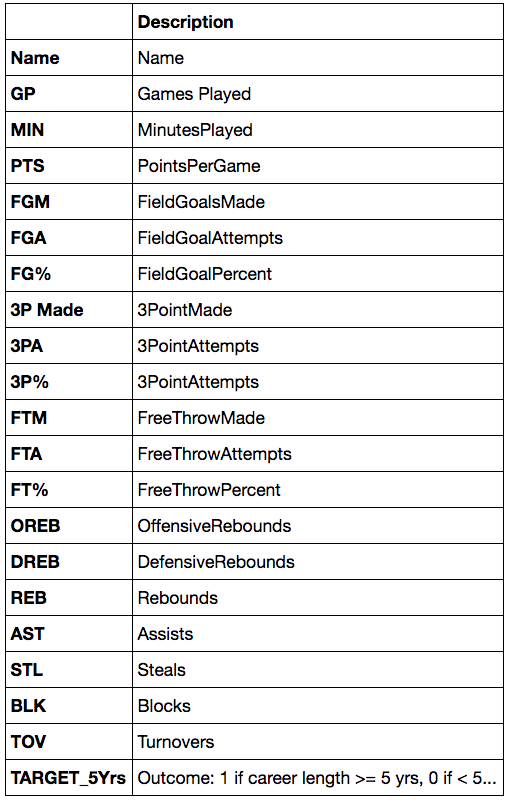

In [1]:
from IPython import display 
display.Image("https://data.world/api/exercises/dataset/logistic-regression-exercise-1/file/raw/Screen%20Shot%202017-01-25%20at%2010.20.38%20AM.png")

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random as random
from sklearn.neighbors import KNeighborsClassifier #knearest neighbour algorithm
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB  
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
pd.set_option('display.max_columns', None) #to show all the columns

C:\Users\uzeea\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# reading csv files
data =  pd.read_csv("players_data.csv", sep=",")
data

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,1.2,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0.0
1336,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,0.8,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1.0
1337,Marlon Maxey,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,1.0,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0.0
1338,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,1.2,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1.0


In [4]:
data.describe()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1329.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,60.414179,17.624627,6.801493,2.629104,5.885299,44.169403,0.247612,0.779179,19.308126,1.297687,1.821940,70.300299,1.009403,2.025746,3.034478,1.550522,0.618507,0.368582,1.193582,0.620149
std,17.433992,8.307964,4.357545,1.683555,3.593488,6.137679,0.383688,1.061847,16.022916,0.987246,1.322984,10.578479,0.777119,1.360008,2.057774,1.471169,0.409759,0.429049,0.722541,0.485531
min,11.000000,3.100000,0.700000,0.300000,0.800000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,47.000000,10.875000,3.700000,1.400000,3.300000,40.200000,0.000000,0.000000,0.000000,0.600000,0.900000,64.700000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,63.000000,16.100000,5.550000,2.100000,4.800000,44.100000,0.100000,0.300000,22.400000,1.000000,1.500000,71.250000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000,1.000000
75%,77.000000,22.900000,8.800000,3.400000,7.500000,47.900000,0.400000,1.200000,32.500000,1.600000,2.300000,77.600000,1.400000,2.600000,4.000000,2.000000,0.800000,0.500000,1.500000,1.000000
max,82.000000,40.900000,28.200000,10.200000,19.800000,73.700000,2.300000,6.500000,100.000000,7.700000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000,1.000000


In [5]:
data.isnull().sum(axis =0)

Name            0
GP              0
MIN             0
PTS             0
FGM             0
FGA             0
FG%             0
3P Made         0
3PA             0
3P%            11
FTM             0
FTA             0
FT%             0
OREB            0
DREB            0
REB             0
AST             0
STL             0
BLK             0
TOV             0
TARGET_5Yrs     0
dtype: int64

In [6]:
#since missing values are insignificant that is less than 1% of our data so we can remove the sample points
data.dropna(axis=0, how='any',inplace=True)

In [7]:
data

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,1.2,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0.0
1336,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,0.8,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1.0
1337,Marlon Maxey,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,1.0,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0.0
1338,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,1.2,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1.0


In [8]:
print("The shape of data after missing values are removed is", data.shape)

The shape of data after missing values are removed is (1329, 21)


In [9]:
data = data.drop("Name",axis =1)

In [10]:
#introducing new feature = : Effectiveness: (Number of Points/minutes) 
#first find total Number of points for each player, in our data set we can do this by Points per game * games played
data["total points"] = data["GP"] * data["PTS"]
#now find Effectiveness by dividing total points
data["Effectiveness"] = data["total points"] / data["MIN"]

The previous is also known as Feature Engineering in Machine Learning and Data Science Terminology

In [11]:
data.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs,total points,Effectiveness
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0,266.4,9.722628
1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0,252.0,9.368030
2,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0,384.8,25.150327
3,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0,330.6,28.500000
4,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0,216.0,18.782609


Text(0.5, 1.0, 'Scatterplot of Effectiveness with total point')

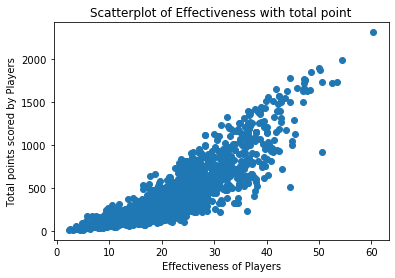

In [12]:
#lets visualize by scatterplot the total points with Effectiveness and see the relation
plt.scatter(x = data["Effectiveness"], y =data["total points"])
plt.xlabel("Effectiveness of Players")
plt.ylabel("Total points scored by Players")
plt.title("Scatterplot of Effectiveness with total point")

In [25]:
data.corr()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs,total points,Effectiveness
GP,1.000000,0.590596,0.539069,0.543000,0.517395,0.296987,0.108195,0.099626,0.038209,0.483185,0.480136,0.197743,0.400184,0.467467,0.460390,0.374311,0.452726,0.276700,0.518693,0.397783,0.693549,0.802247
MIN,0.590596,1.000000,0.911746,0.902864,0.910194,0.208341,0.389474,0.402814,0.165997,0.791089,0.779813,0.236160,0.573655,0.747065,0.710853,0.629147,0.757050,0.401011,0.826431,0.316031,0.891647,0.623578
PTS,0.539069,0.911746,1.000000,0.990874,0.979676,0.261587,0.345289,0.355198,0.151072,0.896245,0.880826,0.254404,0.576421,0.696560,0.679002,0.551561,0.674937,0.390496,0.850272,0.314632,0.965849,0.784871
FGM,0.543000,0.902864,0.990874,1.000000,0.980117,0.297113,0.287956,0.297898,0.119493,0.848146,0.840667,0.219423,0.597468,0.705191,0.692678,0.532261,0.662457,0.400744,0.834343,0.316393,0.958847,0.785760
FGA,0.517395,0.910194,0.979676,0.980117,1.000000,0.135815,0.388860,0.412053,0.197160,0.826244,0.805507,0.264405,0.505547,0.642752,0.616497,0.589038,0.689771,0.325503,0.845952,0.290684,0.940914,0.747777
FG%,0.296987,0.208341,0.261587,0.297113,0.135815,1.000000,-0.291573,-0.347680,-0.330690,0.253381,0.306360,-0.150996,0.512346,0.411103,0.466126,-0.103546,0.061130,0.390786,0.126429,0.235587,0.272551,0.362330
3P Made,0.108195,0.389474,0.345289,0.287956,0.388860,-0.291573,1.000000,0.982579,0.589855,0.155717,0.093059,0.312256,-0.218210,0.018688,-0.070865,0.374314,0.305146,-0.155955,0.257015,0.035025,0.300384,0.159094
3PA,0.099626,0.402814,0.355198,0.297898,0.412053,-0.347680,0.982579,1.000000,0.582337,0.170463,0.105784,0.320901,-0.231050,0.013611,-0.079111,0.408066,0.336757,-0.169245,0.282496,0.016151,0.306683,0.153284
3P%,0.038209,0.165997,0.151072,0.119493,0.197160,-0.330690,0.589855,0.582337,1.000000,0.030320,-0.032333,0.326372,-0.288759,-0.122949,-0.191071,0.262120,0.194329,-0.242274,0.108277,-0.003411,0.124980,0.073703
FTM,0.483185,0.791089,0.896245,0.848146,0.826244,0.253381,0.155717,0.170463,0.030320,1.000000,0.980626,0.253125,0.586325,0.657652,0.657194,0.474403,0.599534,0.412565,0.804762,0.295546,0.872534,0.717019


## Modelling 

In [13]:
#fix the randomness
random.seed(123)
#seperate dependent and independent attributes
Independent = data.drop("TARGET_5Yrs",axis =1)
Dependent   = data["TARGET_5Yrs"]

In [14]:
#Split the data in train(66%) and test(33%):
X_train, X_test, y_train, y_test = train_test_split(Independent, Dependent, test_size=0.33, random_state=42)

In [15]:
print("The shape of training data is : ", X_train.shape)
print("The shape of class variable in  training data is : ", y_train.shape)
print("The shape of test data is : ", X_test.shape)
print("The shape of class variable in testing data is : ", y_test.shape)

The shape of training data is :  (890, 21)
The shape of class variable in  training data is :  (890,)
The shape of test data is :  (439, 21)
The shape of class variable in testing data is :  (439,)


In [16]:
X_train.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,total points,Effectiveness
993,78,39.7,14.4,5.3,12.3,42.9,1.3,3.5,37.3,2.5,3.6,70.0,2.3,3.1,5.4,2.8,1.6,1.0,2.0,1123.2,28.292191
136,82,19.1,9.1,3.6,9.2,39.7,0.1,0.5,27.3,1.7,3.1,55.0,1.3,2.4,3.8,0.9,0.7,0.7,1.6,746.2,39.068063
310,62,8.0,3.7,1.4,3.3,43.6,0.0,0.0,0.0,0.9,1.1,74.6,0.6,1.3,1.9,0.4,0.1,0.1,0.6,229.4,28.675000
1121,24,6.0,2.7,0.9,2.1,41.2,0.0,0.3,16.7,0.9,1.3,71.0,0.7,0.5,1.3,0.1,0.2,0.1,0.5,64.8,10.800000
829,47,15.1,6.2,2.1,5.5,38.6,1.0,2.5,41.4,0.9,1.2,76.4,0.4,1.1,1.5,0.9,0.4,0.1,0.9,291.4,19.298013


### Naive Bayes

In [17]:
#fitting the naive bayes algorithm on the data
gnb = GaussianNB()
#fitting and storing the predictions
predictions = gnb.fit(X_train, y_train).predict(X_test)

## Confusion Matrix

In [18]:
#make confusion matrix
confusion_matrix(y_test, predictions)

array([[127,  26],
       [152, 134]], dtype=int64)

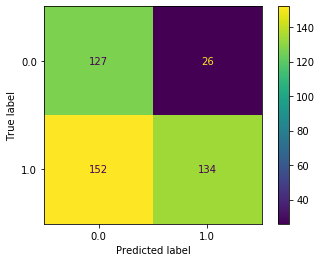

In [19]:
#plot the matrix
plot_confusion_matrix(gnb, X_test, y_test)

## Classification Report

In [20]:
print(classification_report(y_test, predictions, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.46      0.83      0.59       153
           1       0.84      0.47      0.60       286

    accuracy                           0.59       439
   macro avg       0.65      0.65      0.59       439
weighted avg       0.70      0.59      0.60       439



## K-nearest Neighbour

In [21]:
#creating an instance of the model with neighbours = 5
#I choose the value of K by incrementing K by 1  and The K value that gave the high accuracy and f1 score was selected. 
neigh = KNeighborsClassifier(n_neighbors=5)
predictions = neigh.fit(X_train, y_train).predict(X_test)

## Confusion Matrix

In [22]:
#make confusion matrix
confusion_matrix(y_test, predictions)

array([[ 88,  65],
       [ 77, 209]], dtype=int64)

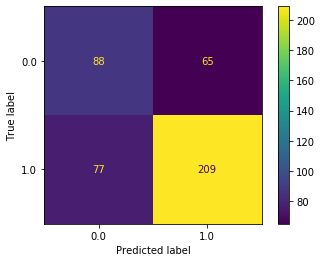

In [23]:
#plot the matrix
plot_confusion_matrix(neigh, X_test, y_test)

## Classification Report

In [24]:
print(classification_report(y_test, predictions, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.53      0.58      0.55       153
           1       0.76      0.73      0.75       286

    accuracy                           0.68       439
   macro avg       0.65      0.65      0.65       439
weighted avg       0.68      0.68      0.68       439



Analyzing the the accuracy, f1-scores we conclude that K-nearest neighbour has best fitted our data among the three models tried on this data set i.e
- Decision Trees (Tutoiral 5)
- Gaussian Naive Bayes
- K-nearest neighbour

## END 